In [8]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import pandas_ta as pda

In [9]:
# pairList = pairJson['hitbtc2018']
pair = 'ETH/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='./database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

Successfully load 39349 candles for ETHUSDT


In [10]:
# -- Indicator variable --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)
df['EMA90']=ta.trend.ema_indicator(df['close'], 90)

df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])

ST_length = 20
ST_multiplier = 3.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 20
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 40
ST_multiplier = 8.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
# df['close-1'] = df['close'].shift(periods=1)
# df['FINAL_SUPER_UP'] = 0

print("Indicators loaded 100%")
df

/home/eliott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Indicators loaded 100%


,open,high,low,close,volume,EMA90,STOCH_RSI,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877,NaN,NaN,0.000000,1,1,1
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,NaN,NaN,NaN,1,1,1
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,NaN,NaN,NaN,1,1,1
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,NaN,NaN,NaN,1,1,1
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16 18:00:00,3070.61,3098.98,3065.14,3093.50,7508.63050,3040.948878,0.419374,2893.786752,-1,1,1
2022-02-16 19:00:00,3093.50,3186.77,3081.89,3166.19,50138.40720,3043.701430,1.000000,2893.786752,1,1,1
2022-02-16 20:00:00,3169.28,3179.10,3146.36,3148.58,16001.77130,3046.006454,0.819582,2893.786752,1,1,1


In [11]:
# -- Intern parameter --
# dfTest = df['2017-10-24':'2018-01-31']
dfTest = df[:]
startingBalance = 1000
makerFee = 0.0002
takerFee = 0.0007

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
timeLimitActivation = False
showLog = False
waitNextSignal = False

# -- Hyper parameters --
stochOverBought = 0.85
stochOverSold = 0.25
SlPct = 0.02
TpPct = 0.02
timeLimit = 17


# -- Trade Functions --
# -- Condition to BUY market --

def buyCondition(row, previousRow):
    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < stochOverBought and row['close']>row['EMA90']:
        return True
    else:
        return False

# -- Condition to SELL market --


def sellCondition(row, previousRow):
    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > stochOverSold:
        return True
    else:
        return False


# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True
currentTimeOpen = 0
timeSince = 0

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet', 'timeSince'])

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
    timeSince += 1
    if currentTimeOpen > 0:
        currentTimeOpen += 1
    # -- Buy market order --
    if buyCondition(row, previousRow) and usd > 0 and buyReady == True:
        # -- You can define here at what price you buy --
        buyPrice = row['close']

        # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
        if StopLossActivation:
            stopLoss = buyPrice - SlPct * buyPrice
        if takeProfitActivation:
            takeProfit = buyPrice + TpPct * buyPrice
        if timeLimitActivation:
            currentTimeOpen = 1

        fee = takerFee * usd
        usd = usd - fee
        coin = usd / buyPrice
        usd = 0
        wallet = coin * row['close']

        if showLog:
            print("Buy COIN at", buyPrice, '$ the', index)

        # -- Add the trade to dfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Buy",
            'reason': 'Buy Market Order',
            'price': buyPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0

    # -- Take Profit --
    elif row['high'] > takeProfit and coin > 0:
        sellPrice = takeProfit
        usd = coin * sellPrice
        fee = makerFee * usd
        usd = usd - fee
        coin = 0
        wallet = usd

        if waitNextSignal:
            buyReady = False

        # -- You can uncomment the line below if you want to see logs --
        if showLog:
            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

        # -- Add the trade to dfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Sell",
            'reason': 'Sell Take Profit',
            'price': sellPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0
    # -- Stop Loss --
    elif row['low'] < stopLoss and coin > 0:
        sellPrice = stopLoss
        usd = coin * sellPrice
        fee = makerFee * usd
        usd = usd - fee
        coin = 0
        wallet = usd

        currentTimeOpen = 0

        if waitNextSignal:
            buyReady = False

        # -- You can uncomment the line below if you want to see logs --
        if showLog:
            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)
        # -- Add the trade to dfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Sell",
            'reason': 'Sell Stop Loss',
            'price': sellPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0

    # -- Sell Market Order --
    elif sellCondition(row, previousRow):
        buyReady = True
        if coin > 0:
            # -- You can define here at what price you buy --
            sellPrice = row['close']
            usd = coin * sellPrice
            fee = takerFee * usd
            usd = usd - fee
            coin = 0
            # buyReady = True
            wallet = usd

            # -- You can uncomment the line below if you want to see logs --
            if showLog:
                print("Sell COIN at", sellPrice, '$ the', index)

            # -- Add the trade to DfTrades to analyse it later --
            myrow = {
                'date': index,
                'position': "Sell",
                'reason': 'Sell Market Order',
                'price': sellPrice,
                'frais': fee,
                'fiat': usd,
                'coins': coin,
                'wallet': wallet,
                'timeSince': timeSince
            }
            dfTrades = dfTrades.append(myrow, ignore_index=True)
            timeSince = 0

    elif currentTimeOpen > timeLimit and coin > 0:
        sellPrice = row['close']
        usd = coin * sellPrice
        fee = takerFee * usd
        usd = usd - fee
        coin = 0
        if waitNextSignal:
            buyReady = False
        wallet = usd

        # -- You can uncomment the line below if you want to see logs --
        if showLog:
            print("Sell COIN at", sellPrice, '$ the', index)

        # -- Add the trade to DfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Sell",
            'reason': 'Sell Time Market Order',
            'price': sellPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0
    previousRow = row

print("Final wallet", wallet)


Final wallet 60871.97366961859


In [12]:
BTobject = Backtesting()
newDf = BTobject.simple_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTest, pairSymbol=pair, timeframe=timeframe)

Pair Symbol : ETH/USDT | Timeframe : 1h
Period : [2017-08-17 04:00:00] -> [2022-02-16 22:00:00]
Starting balance : 999.3 $

----- General Informations -----
Final balance : 60871.97 $
Performance vs US Dollar : 5991.46 %
Buy and Hold Performence : 939.85 %
Performance vs Buy and Hold : 485.8 %
Best trade : +66.74 %, the 2021-01-04 14:00:00
Worst trade : -11.97 %, the 2021-01-11 07:00:00
Worst drawDown : - 46.18 %
Total fees :  10753.4 $

----- Trades Informations -----
Total trades on period : 281
Number of positive trades : 112
Number of negative trades :  169
Trades win rate ratio : 39.86 %
Average trades performance : 1.96 %
Average positive trades : 9.56 %
Average negative trades : -3.08 %

----- Time Informations -----
Average time duration for a trade : 70.4 periods
Maximum time duration for a trade : 390 periods
Minimum time duration for a trade : 4 periods
Average time duration between two trades : 69.24 periods
Maximum time duration between two trades : 469 periods
Minimum tim

----- 2017 Performances: 70.21% -----


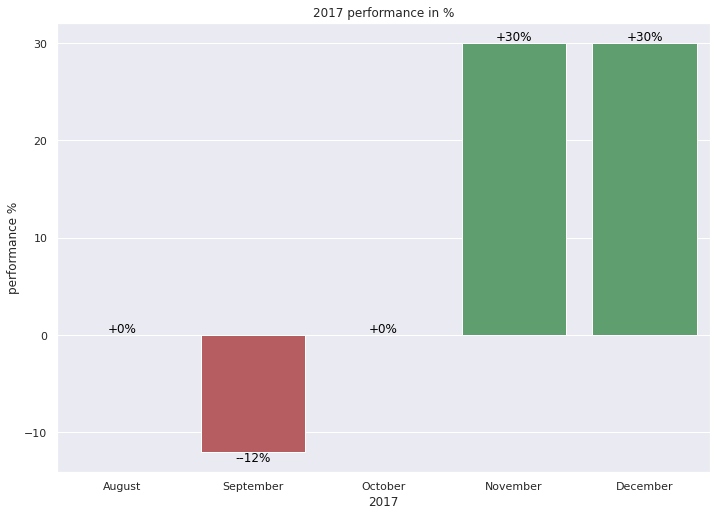

----- 2018 Performances: 145.33% -----


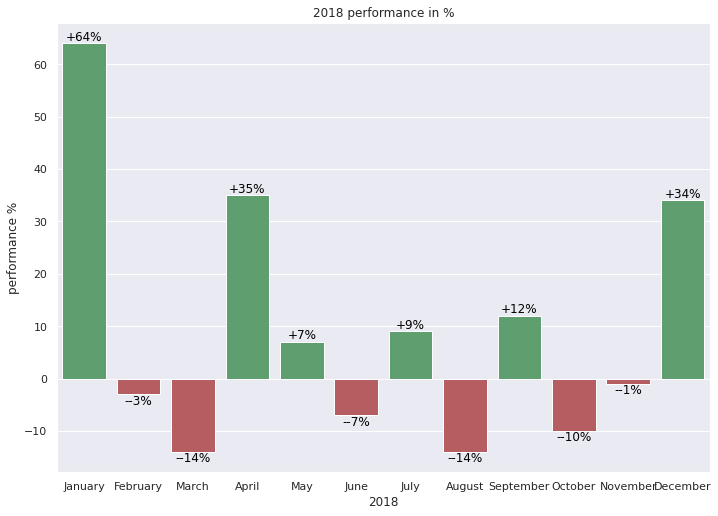

----- 2019 Performances: 19.78% -----


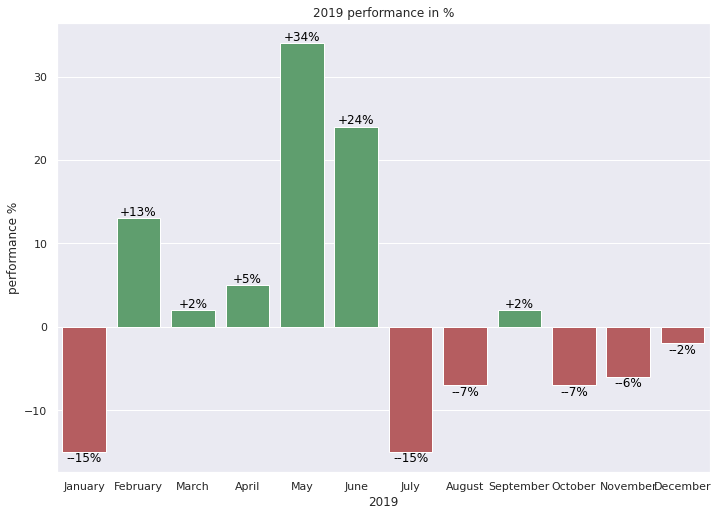

----- 2020 Performances: 408.68% -----


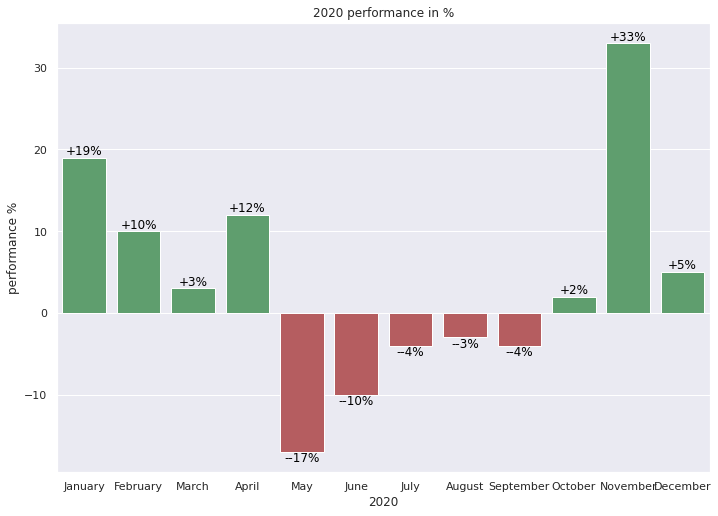

----- 2021 Performances: 50.73% -----


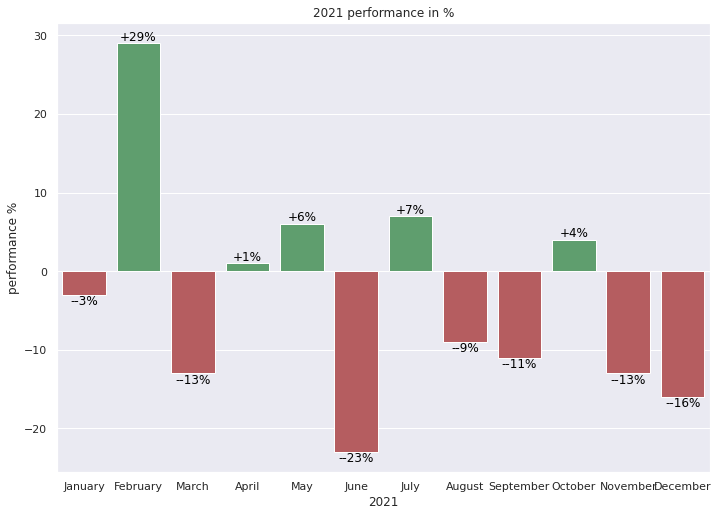

----- 2022 Performances: -13.28% -----


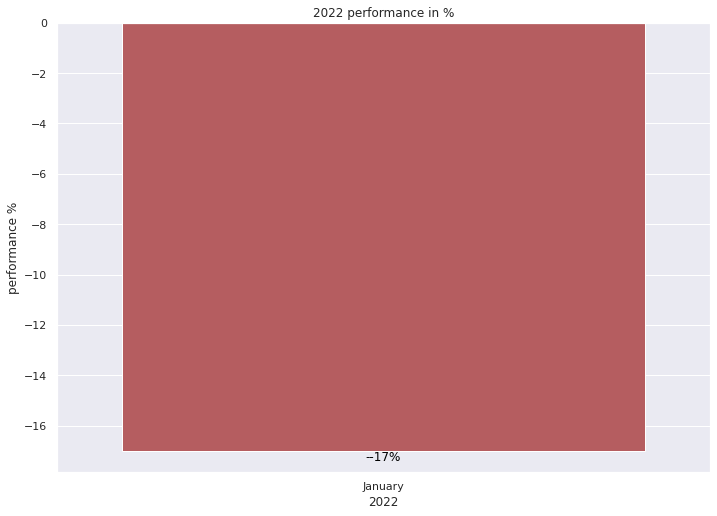

In [13]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


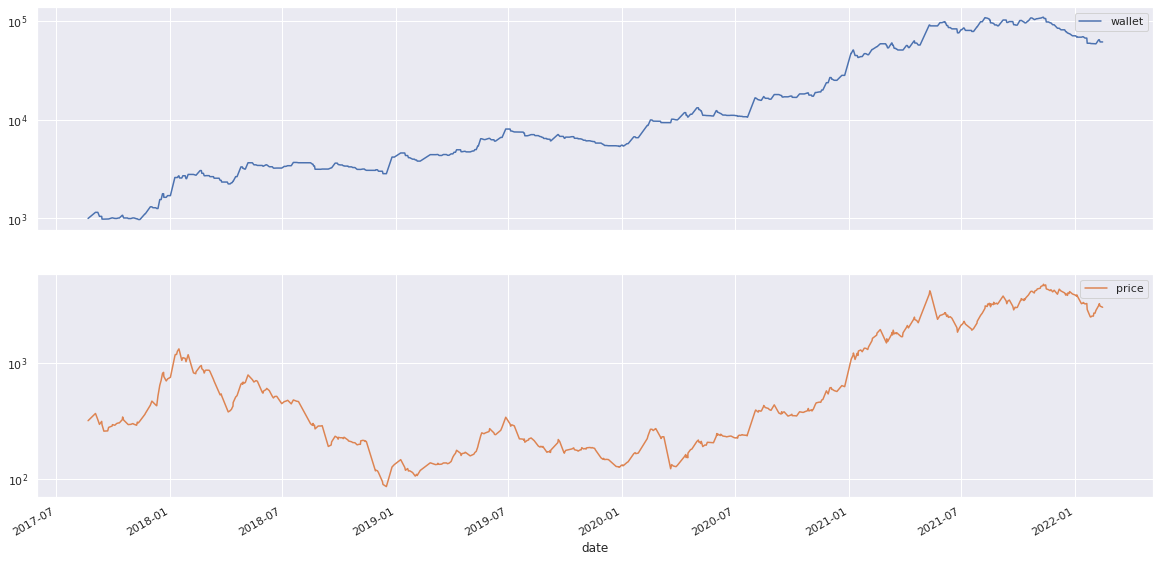

In [14]:
BTobject.plot_wallet_vs_price(dfTrades=dfTrades)